# 1.2 Pandas

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература

- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous. 
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
- education-num: continuous. 
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
- sex: Female, Male. 
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous. 
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.__version__

'1.0.1'

Если вы увидели warning, не переживайте, всё хорошо. 
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [53]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
df = pd.read_csv('../../../../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
#df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Часть 1 (13 баллов)

1) Выведите последние 10 элеметнов датасета (1 балл)

In [54]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K
32552,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32553,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32554,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32555,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32560,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


2) Сколько колонок и сколько строк в этом датасете? (1 балл)

In [55]:
df.shape

(32561, 15)

3) Какие типы данных у элементов этого датасета? (1 балл)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


4) Какие признаки имеют пропуски? (1 балл)

In [58]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже. (3 балла)

Ваш ответ:

'workclass' и 'occupation' практически совпадают по количеству пропущенных значений, они связаны между собой. Видимо это не занятые, безработные люди либо нет информации об их занятости, поэтому эти значения пропущены.

Что касается 'native.country', большинство таких людей имеют 'workclass' == 'Private'. Тут не понял, это бизнесмены или кто...

Судя по описанию из этой [книги](https://books.google.ru/books?id=Q4ZC35u49OsC&pg=PA37&lpg=PA37&dq=us+Census+Private+U.S.+citizens+what+is?&source=bl&ots=YrEh60iWAP&sig=ACfU3U2wO2qXgHLqBtLuxp0GUkBNtFimgQ&hl=ru&sa=X&ved=2ahUKEwjlyPCRsZboAhUtmYsKHUbUArwQ6AEwDXoECAsQAQ#v=onepage&q=us%20Census%20Private%20U.S.%20citizens%20what%20is%3F&f=false), 'Private U.S. citizens' это люди, которые длительное время проживают за пределами США. Видимо поэтому часть данных получить не удалось.

In [59]:
df[df['native.country'].isnull()].groupby('workclass')['occupation',].count()

,occupation
workclass,
Federal-gov,17
Local-gov,26
Private,410
Self-emp-inc,42
Self-emp-not-inc,42
State-gov,19


6) Какие и сколько различных рабочих классов workclass представлено в выборке? (2 балла)

In [62]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

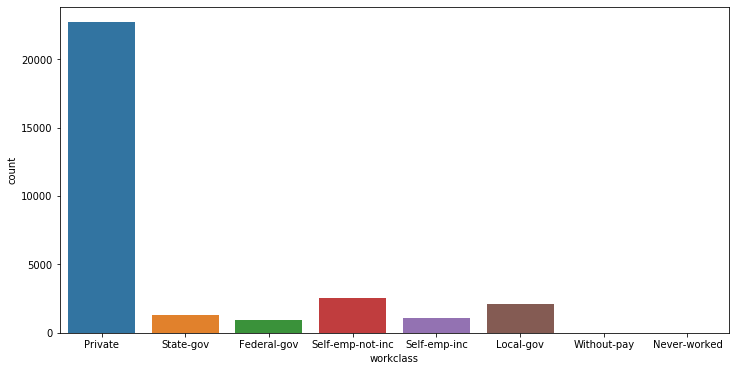

In [63]:
plt.figure(figsize=(12,6))
sns.countplot(x='workclass', data=df)

7) Какой средний возраст женщин и мужчин? (1 балл)

In [64]:
df.groupby('sex')['age',].mean()

,age
sex,
Female,36.858230
Male,39.433547


8) Постройте гистограмму(bar) распределения образования людей (education) (2 балла)

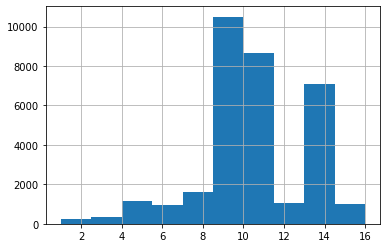

In [68]:
df['education.num'].hist();

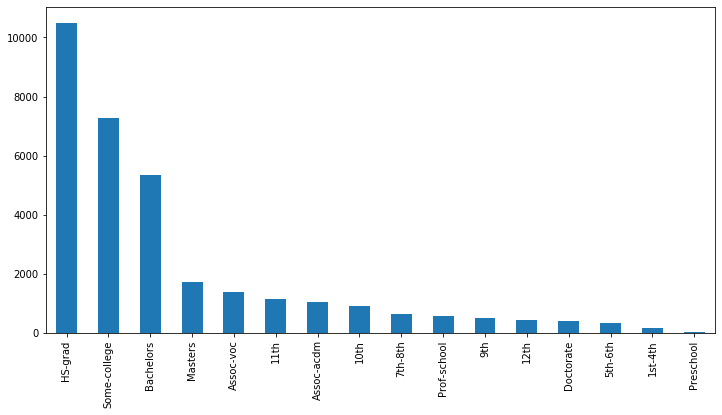

In [69]:
plt.figure(figsize=(12,6))
df['education'].value_counts().plot(kind='bar');

## Часть 2 (18 баллов)

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак salary) и тех, кто получает менее 50K в год? (2 балла)

*признака "salary" нет в выборке, я полагаю, что вместо него "income"

In [70]:
df.groupby('income')['age'].agg([np.mean,np.std])

,mean,std
income,,
<=50K,36.783738,14.020088
>50K,44.249841,10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate) (2 балла)

! Судя по [википедии](https://ru.wikipedia.org/wiki/%D0%9E%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%B2_%D0%A1%D0%A8%D0%90#%D0%92%D1%8B%D1%81%D1%88%D0%B5%D0%B5_%D0%BE%D0%B1%D1%80%D0%B0%D0%B7%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5), колледж это тоже высшее учебное заведение.

Создам признак, указывающий на высшее образование:

In [71]:
higher_education = ['Some-college','Bachelors', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', 'Masters', 'Doctorate']

In [72]:
df['higher.education'] = df['education'].apply(lambda x: 1 if x in higher_education else 0)

In [100]:
df['higher.education'].value_counts()

1    17807
0    14754
Name: higher.education, dtype: int64

In [75]:
df.groupby('income')['higher.education'].value_counts(normalize=True)

income  higher.education
<=50K   0                   0.519215
        1                   0.480785
>50K    1                   0.755261
        0                   0.244739
Name: higher.education, dtype: float64

Ответ: люди и без высшего образованию получают более 50К, но их в 3 раза меньше, чем людей с высшим образованием.

11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми. (2 балла)

In [76]:
#Создам новый признак
df['is.married']= df['marital.status'].apply(lambda x: x.startswith('Married')).astype(int);

In [77]:
df[df['income']=='>50K']['is.married'].value_counts(normalize=True)

1    0.859074
0    0.140926
Name: is.married, dtype: float64

Ответ: среди зарабатывающих много, больше всего женатых, причем значительно (86%)

12) Посчитайте среднее время работы (hours-per-week) зарабатывающих мало и много (salary) для каждой страны (native-country). (3 балла)

In [78]:
df.groupby(['income','native.country'])['hours.per.week'].mean().unstack().T

income,<=50K,>50K
native.country,,
Cambodia,41.416667,40.000000
Canada,37.914634,45.641026
China,37.381818,38.900000
Columbia,38.684211,50.000000
Cuba,37.985714,42.440000
Dominican-Republic,42.338235,47.000000
Ecuador,38.041667,48.750000
El-Salvador,36.030928,45.000000
England,40.483333,44.533333


13) Постройте сводную таблицу для сравнения уровня образования и разницы между capital.gain и capital.loss (то есть пассивный доход). Сделайте так, чтобы capital.gain - capital.loss создали не больше 10 разных уникальных значений. То есть, gain и loss - это числа в каком-то диапазоне. Это количественные признаки из вещественных чисел. С помощью математических функций, типа log, извлечение корня N-ой степени и округления можно перейти к категориальным признакам. (4 балла)

Иначе говоря, нужно разбить множество всех значений на куски (классы) и вместо конкретного значения оставлять на месте числа имя (в данном случае номер) класса. Выглядеть это должно как-то так:


```
10000 -> 13
  650 -> 9
  450 -> 9
  404 -> 9
 1000 -> 10
   26 -> 5 
 5000 -> 12
    1 -> 0
```



Число 250 выбрано экспериментальным путем, чтобы подогнать под ограничение про не более 10 классов. Ограничений на класс с отрицательным значением не было, даже наоборот, так легче воспринимается информация, т.к. отрицательный класс говорит об обытках и положительный о прибыли.

In [79]:
df['capital'] = df['capital.gain'] - df['capital.loss']

In [80]:
df['capital.class'] = np.round(np.cbrt((df['capital'])/250),0)

In [81]:
df['capital.class'].value_counts()

 0.0    28330
-2.0     1488
 3.0     1233
 2.0      728
 4.0      494
 7.0      159
 5.0       56
 1.0       42
-1.0       28
-3.0        3
Name: capital.class, dtype: int64

Посмотрим на графики распределения дохода и классов дохода:

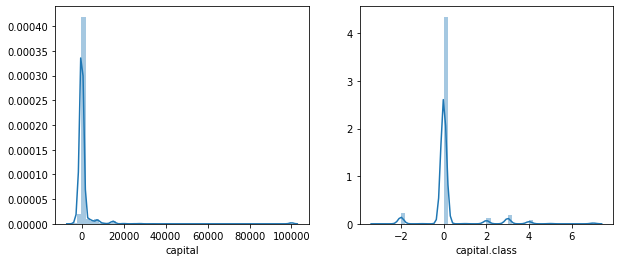

In [84]:
plt.figure (figsize = (10,4))
plt.subplot(1,2,1)
sns.distplot(df['capital']);
plt.subplot(1,2,2)
sns.distplot(df['capital.class']);

Т.к. если указан прирост капитала,то потеря капитала всегда ноль, и наоборот, т.е. нет ситуаций, когда оба признака имеют отличные от нуля цифры у одного объекта, то можно сделать вывод, что там, где 'capital.gain' и 'capital.loss' == 0, это указывает на то, что люди вообще не занимаются инвестициями и не имеют пассивный доход, либо это крайний случай, когда gain и loss совпадали при формировании датасета, что маловероятно.

Матрица класса дохода от ивестиций с группировокой по высшему образованию:

In [85]:
pd.crosstab([df['higher.education'],df['education']], df['capital.class'])

capital.class                  -3.0  -2.0  -1.0   0.0   1.0   2.0   3.0   4.0  \
higher.education education                                                      
0                10th             0    27     1   865     2    23    10     2   
                 11th             0    32     1  1089     5    21    23     4   
                 12th             0     8     0   403     3     6    10     3   
                 1st-4th          0     4     0   159     0     3     2     0   
                 5th-6th          0    11     0   308     0     8     6     0   
                 7th-8th          0    23     0   582     0    27    14     0   
                 9th              0     8     1   474     3    23     4     0   
                 HS-grad          2   390    11  9415    12   266   314    62   
                 Preschool        0     2     0    47     0     0     1     0   
1                Assoc-acdm       0    55     0   930     0    25    41    14   
                 Assoc-voc        0    53     1  1194     2    37    75    16   
                 Bachelors        0   332     6  4384     0   100   318   160   
                 Doctorate        0    53     0   284     1     4    26    29   
                 Masters          0   146     3  1300     0    26   135    83   
                 Prof-school      0    64     0   363     0     9    22    62   
                 Some-college     1   280     4  6533    14   150   232    59   

capital.class                   5.0   7.0  
higher.education education                 
0                10th             1     2  
                 11th             0     0  
                 12th             0     0  
                 1st-4th          0     0  
                 5th-6th          0     0  
                 7th-8th          0     0  
                 9th              0     1  
                 HS-grad          6    23  
                 Preschool        1     0  
1                Assoc-acdm       1     1  
                 Assoc-voc        3     1  
                 Bachelors       14    41  
                 Doctorate        4    12  
                 Masters         12    18  
                 Prof-school     10    46  
                 Some-college     4    14

In [102]:
#Потеря капитала на инвестициях с группировокой по высшему образованию
df[df['capital.class']<0].groupby('higher.education')['capital.class',].count()

,capital.class
higher.education,
0,521
1,998


In [97]:
#Увеличение капитала на инвестициях с группировокой по высшему образованию
df[df['capital.class']>0].groupby('higher.education')['capital.class',].count()

,capital.class
higher.education,
0,891
1,1821


In [107]:
df[df['capital.class']!=0].groupby('education')['capital.class',].count()

,capital.class
education,
10th,68
11th,86
12th,30
1st-4th,9
5th-6th,25
7th-8th,64
9th,40
Assoc-acdm,137
Assoc-voc,188


Выводы: 

Среди людей, занимающимися инвестициями, людей с высшим образованием больше на ~50% (с учетом, что колледж это высшее образование и класс 0 говорит нам о том, что люди не занимаются инвестициями). 
Самые успешные в инвестициях это люди с образованием: Prof-school, Bachelors.

Наличие высшего образования:

In [101]:
df['higher.education'].value_counts()

1    17807
0    14754
Name: higher.education, dtype: int64

Не занимающиеся инвестициями:

In [66]:
df[df['capital.class']==0].groupby('higher.education')['capital.class',].count()

,capital.class
higher.education,
0,13342
1,14988


Доп. инфо:

Преобразование признаков:
- https://datascience.stackexchange.com/questions/21650/feature-transformation-on-input-data

- https://neurohive.io/ru/tutorial/primer-reshenija-realnoj-zadachi-po-mashinnomu-obucheniju-na-python/

14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще. (2 балла)

In [145]:
df[df['sex'] == 'Female'].groupby(['native.country'])['income'].value_counts(normalize=True).unstack().sort_values(by='>50K',ascending=False)

income,<=50K,>50K
native.country,,
Yugoslavia,0.666667,0.333333
Taiwan,0.733333,0.266667
France,0.750000,0.250000
Japan,0.750000,0.250000
Iran,0.750000,0.250000
China,0.761905,0.238095
Italy,0.761905,0.238095
Canada,0.769231,0.230769
Scotland,0.800000,0.200000


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary (3 балла)

In [77]:
from random import randint

In [78]:
#Создам признак "зарплата"
df['magic.salary'] = df['income'].apply(lambda x: randint(0,50) if x == '<=50K' else randint(51,200))

In [79]:
#Создам признак "зароботок в час"
df['magic.salary.per.hour'] = df['magic.salary'] / df['hours.per.week']

In [80]:
df.groupby('education')[['magic.salary.per.hour']].mean().sort_values(by='magic.salary.per.hour',ascending=False)

,magic.salary.per.hour
education,
Doctorate,2.737659
Prof-school,2.294511
Masters,2.147841
Bachelors,1.669612
Assoc-acdm,1.488906
Assoc-voc,1.377805
Some-college,1.285249
HS-grad,1.117748
10th,1.086198
